# this is revised methods and data for my Video Presentation

In [8]:
import pandas as pd
import re

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np


from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from wordcloud import WordCloud

from nltk.sentiment.vader import SentimentIntensityAnalyzer

import numpy as np
import pandas as pd
import math
import warnings

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pyLDAvis
from sklearn.feature_extraction.text import TfidfVectorizer
import math
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore", category=DeprecationWarning)




## DATA COLLECTION AND CONSOLIDATION

In [9]:
# read csv called combinedTextData.csv into as a df
df1 = pd.read_csv('combinedTextData.csv')
df1.sample(3)
print(df1['LABEL'].value_counts())
print("\nUnique labels in DF1:", df1['LABEL'].unique())


LABEL
AIart    323
art      300
Name: count, dtype: int64

Unique labels in DF1: ['AIart' 'art']


In [10]:
df2 = pd.read_csv('Mod2CombinedCleaned.csv')
if 'Unnamed: 0' in df2.columns:
    df2 = df2.drop(columns=['Unnamed: 0'])

print(df2['LABEL'].value_counts())
print("\nUnique labels in DF1:", df2['LABEL'].unique())
#rename the column

LABEL
AIArt    484
ART      164
Art       50
AIART      5
Name: count, dtype: int64

Unique labels in DF1: ['AIArt' 'AIART' 'ART' 'Art']


In [11]:
df3=pd.read_csv('VIDEOartnewsAPI.csv')

print(df3['LABEL'].value_counts())
print("\nUnique labels in DF1:", df3['LABEL'].unique())

LABEL
art    64
Name: count, dtype: int64

Unique labels in DF1: ['art']


In [12]:
df3=pd.read_csv('VIDEOartnewsAPI.csv')

def clean_text(text):
    if pd.isnull(text):
        return ''
    # Remove HTML tags if any
    text = re.sub(r'<[^>]+>', '', text)
    # Replace newlines and weird escapes
    text = text.replace('\n', ' ').replace('\r', ' ').strip()
    # Keep only letters, numbers, punctuation
    text = re.sub(r'[^A-Za-z0-9.,!?\'"()\-:; ]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

final_contents = []

for idx, row in df3.iterrows():
    news_content = str(row['newsApiContent'])
    full_article = str(row['fullArticleContent'])

    # Remove "[+1234 chars]" patterns from newsApiContent
    news_content_cleaned = re.sub(r'\[\+\d+\schars\]', '', news_content).strip()

    # Check if cleaned newsApiContent appears inside fullArticleContent
    if news_content_cleaned in full_article:
        chosen_text = full_article
    else:
        chosen_text = news_content_cleaned

    # Clean the final text
    cleaned_text = clean_text(chosen_text)
    final_contents.append(cleaned_text)

# 4. Replace df3's content
df3['content'] = final_contents

print(df3.head(3))


  LABEL                                     newsApiContent  \
0   art  We ran a story about a wall-mounted plotter bo...   
1   art  At the Pace gallery in Chelsea in early April,...   
2   art  Shivani Chaudhari\r\nAlexandra Johnson has sol...   

                                  fullArticleContent  \
0  We ran a story about a wall-mounted plotter bo...   
1  At the Pace gallery in Chelsea in early April,...   
2  The ex-city trader who sold Malala painting fo...   

                                             content  
0  We ran a story about a wall-mounted plotter bo...  
1  At the Pace gallery in Chelsea in early April,...  
2  Shivani Chaudhari Alexandra Johnson has sold h...  


In [13]:

df3.sample(3)

,LABEL,newsApiContent,fullArticleContent,content
60,art,A visit to the marble-covered Apple Via del Co...,"The outside of Apple Via del Corso in Rome, It...",A visit to the marble-covered Apple Via del Co...
34,art,"Frida Kahlo, 'Frieda and Diego Rivera (Frieda ...",NaN,"Frida Kahlo, 'Frieda and Diego Rivera (Frieda ..."
39,art,"Paul Simon, Art Garfunkel and their collaborat...","Paul Simon, Art Garfunkel and their collaborat...","Paul Simon, Art Garfunkel and their collaborat..."


In [14]:
print("DF1 LABEL COUNTS:")
print(df1['LABEL'].value_counts())
print("\nUnique labels in DF1:", df1['LABEL'].unique())

print("\nDF2 LABEL COUNTS:")
print(df2['LABEL'].value_counts())
print("\nUnique labels in DF2:", df2['LABEL'].unique())

print("\nDF3 LABEL COUNTS:")
print(df3['LABEL'].value_counts())
print("\nUnique labels in DF2:", df3['LABEL'].unique())

DF1 LABEL COUNTS:
LABEL
AIart    323
art      300
Name: count, dtype: int64

Unique labels in DF1: ['AIart' 'art']

DF2 LABEL COUNTS:
LABEL
AIArt    484
ART      164
Art       50
AIART      5
Name: count, dtype: int64

Unique labels in DF2: ['AIArt' 'AIART' 'ART' 'Art']

DF3 LABEL COUNTS:
LABEL
art    64
Name: count, dtype: int64

Unique labels in DF2: ['art']


In [15]:
label_mapping = {
    'AIart': 'AiArt',
    'AIArt': 'AiArt',
    'Aiart': 'AiArt',
    'AiArt': 'AiArt',
    'AIART': 'AiArt',
    'ART': 'art',
    'Art': 'art',
    'art': 'art'
}

# APPLY using .replace() -- THIS WILL NOT CREATE NANS
df1['LABEL'] = df1['LABEL'].replace(label_mapping)
df2['LABEL'] = df2['LABEL'].replace(label_mapping)
df3['LABEL'] = df3['LABEL'].replace(label_mapping)

#rename the column 'content' in df2 and df3 to 'text'
df2.rename(columns={'content': 'text'}, inplace=True)
df3.rename(columns={'content': 'text'}, inplace=True)

VIDEOdf = pd.concat([df1[['LABEL', 'text']], df2[['LABEL', 'text']], df3[['LABEL', 'text']]], ignore_index=True)
print(VIDEOdf['LABEL'].value_counts())
print(VIDEOdf.head())


LABEL
AiArt    812
art      578
Name: count, dtype: int64
   LABEL                                               text
0  AiArt  Call of Duty fans speculate what Season could ...
1  AiArt  The first trailer for Marvel s upcoming Fantas...
2  AiArt  No Siri data has ever been used for marketing ...
3  AiArt  This unusual tattoo hack by Emily The Engineer...
4  AiArt  This article is part of Gizmodo Deals produced...


In [16]:
print(VIDEOdf['LABEL'].value_counts())
print("\nUnique labels in DF2:", VIDEOdf['LABEL'].unique())

LABEL
AiArt    812
art      578
Name: count, dtype: int64

Unique labels in DF2: ['AiArt' 'art']


In [17]:
VIDEOdf.to_csv('VIDEODATA.csv', index=False)

In [18]:
VIDEOdf.sample(4)

,LABEL,text
803,AiArt,people doing this are having your cake and eat...
598,art,a spongebob id want this in my house i love ...
635,AiArt,sarcastic arguments only
1093,art,pinup uthedude_abides digital the gta loadin...


## COUNT VECTORIZE IT 

In [19]:
def display_confusion_matrix(y_true, y_pred, model_name, model):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues")
    plt.title(model_name)
    plt.show()

In [20]:
min_n = VIDEOdf['LABEL'].value_counts().min()  # 578
balanced_df = (
    VIDEOdf
    .groupby('LABEL')
    .sample(n=min_n, random_state=42)
    .reset_index(drop=True)
)

print(balanced_df['LABEL'].value_counts())


LABEL
AiArt    578
art      578
Name: count, dtype: int64


In [21]:
texts = balanced_df['text'].fillna('').tolist()
labels = balanced_df['LABEL'].tolist()

vectorizer500 = CountVectorizer(
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # words ≥3 letters
    lowercase=True,
    ngram_range=(1,4),
    stop_words='english',
    max_features=500,
    max_df=0.1,
)

dtm500 = vectorizer500.fit_transform(texts)
feature_names = vectorizer500.get_feature_names_out()

df500 = pd.DataFrame(dtm500.toarray(), columns=feature_names)
df500.insert(0, 'LABEL', labels)
print(df500['LABEL'].value_counts())

LABEL
AiArt    578
art      578
Name: count, dtype: int64


In [22]:
print(df500.columns.tolist())


['LABEL', 'ability', 'able', 'absolutely', 'according', 'account', 'actual', 'add', 'adobe', 'advice', 'ago', 'air', 'amazing', 'american', 'animation', 'anime', 'app', 'apple', 'apps', 'architecture', 'arent', 'artist', 'artistic', 'arts', 'artwork', 'ask', 'attention', 'available', 'away', 'awesome', 'background', 'bad', 'based', 'basically', 'beautiful', 'believe', 'big', 'black', 'blue', 'body', 'book', 'books', 'brush', 'brushes', 'build', 'building', 'built', 'business', 'buy', 'called', 'came', 'case', 'change', 'chappe', 'character', 'characters', 'chatgpt', 'cheap', 'check', 'children', 'city', 'clear', 'close', 'collection', 'color', 'colors', 'com', 'come', 'comes', 'coming', 'comment', 'comments', 'common', 'community', 'companies', 'company', 'completely', 'computer', 'concept', 'consider', 'contemporary', 'content', 'cool', 'copyright', 'cost', 'couple', 'course', 'created', 'creating', 'creation', 'creative', 'creativity', 'credit', 'culture', 'current', 'currently', 'da

['LABEL', 'ability', 'able', 'absolutely', 'according', 'account', 'actual', 'add', 'adobe', 'advice', 'ago', 'air', 'amazing', 'american', 'animation', 'anime', 'app', 'apple', 'apps', 'architecture', 'arent', 'artist', 'artistic', 'arts', 'artwork', 'ask', 'attention', 'available', 'away', 'awesome', 'background', 'bad', 'based', 'basically', 'beautiful', 'believe', 'big', 'black', 'blue', 'body', 'book', 'books', 'brush', 'brushes', 'build', 'building', 'built', 'business', 'buy', 'called', 'came', 'case', 'change', 'chappe', 'character', 'characters', 'chatgpt', 'cheap', 'check', 'children', 'city', 'clear', 'close', 'collection', 'color', 'colors', 'com', 'come', 'comes', 'coming', 'comment', 'comments', 'common', 'community', 'companies', 'company', 'completely', 'computer', 'concept', 'consider', 'contemporary', 'content', 'cool', 'copyright', 'cost', 'couple', 'course', 'created', 'creating', 'creation', 'creative', 'creativity', 'credit', 'culture', 'current', 'currently', 'da

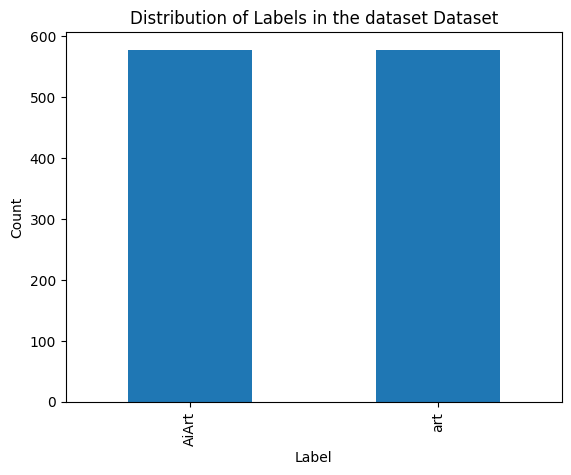

In [23]:
print(df500.columns.tolist())
df500['LABEL'].value_counts().plot(kind='bar')
plt.title('Distribution of Labels in the dataset Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [24]:
df500.to_csv('df500.csv', index=False)

In [25]:
print(df500.sample(10))

      LABEL  ability  able  absolutely  according  account  actual  add  \
380   AiArt        0     0           0          0        0       0    0   
1014    art        0     1           0          0        0       0    0   
1064    art        0     0           0          0        0       0    0   
1046    art        0     0           0          0        0       0    0   
516   AiArt        0     0           0          0        0       0    0   
916     art        0     0           0          0        0       0    0   
568   AiArt        0     1           0          0        0       1    0   
230   AiArt        0     0           0          0        0       0    0   
67    AiArt        0     0           0          0        0       0    0   
80    AiArt        0     0           0          0        0       0    0   

      adobe  advice  ...  wow  write  writing  wrong  yeah  years ago  yes  \
380       0       0  ...    0      0        0      0     0          0    0   
1014      0       

## LDA 

In [26]:

texts = balanced_df['text'].fillna('').tolist()
labels = balanced_df['LABEL'].tolist()

vectorizer500 = TfidfVectorizer(
    token_pattern=r'\b[a-zA-Z]{3,}\b',  # same: words ≥3 letters
    lowercase=True,
    ngram_range=(1,4),
    stop_words='english',
    max_features=500,
    max_df=0.1,
)

dtm500 = vectorizer500.fit_transform(texts)
feature_names = vectorizer500.get_feature_names_out()

# Build the dataframe
tfdf500 = pd.DataFrame(dtm500.toarray(), columns=feature_names)
tfdf500.insert(0, 'LABEL', labels)
print(tfdf500['LABEL'].value_counts())


LABEL
AiArt    578
art      578
Name: count, dtype: int64


In [27]:
tfdf500.sample(10)


,LABEL,ability,able,absolutely,according,account,actual,add,adobe,advice,...,wow,write,writing,wrong,yeah,years ago,yes,youll,young,youtube
1065,art,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
239,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.268281,0.0,0.0,0.000000,0.000000
287,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
736,art,0.0,0.0,0.0,0.14752,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.135503
634,art,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.059641,0.000000
333,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
14,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.092533
342,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.194027
584,art,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
234,AiArt,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [28]:
dtm_df = tfdf500.drop(columns=['LABEL'])
dtm = dtm_df.values
feature_names = dtm_df.columns.tolist()
print(f"DTM shape: {dtm.shape}")

DTM shape: (1156, 500)


In [29]:

labels_array = tfdf500['LABEL'].values

aiart_mask = (labels_array == 'AiArt')
art_mask = (labels_array == 'art')


aiart_word_scores = dtm_df[aiart_mask].sum(axis=0)
art_word_scores = dtm_df[art_mask].sum(axis=0)

word_label_assoc = {}

for word in feature_names:
    if aiart_word_scores[word] > art_word_scores[word]:
        word_label_assoc[word] = 'AiArt'
    elif art_word_scores[word] > aiart_word_scores[word]:
        word_label_assoc[word] = 'art'
    else:
        word_label_assoc[word] = 'Mixed'



In [31]:
NUM_TOPICS = 10

lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=500,
    learning_method='online',
    random_state=42
)

doc_topic_dists = lda_model.fit_transform(dtm)
print("LDA fitting complete.")

LDA fitting complete.


In [ ]:
num_top_words = 10
topic_labels = []

for tidx, topic in enumerate(lda_model.components_):
    top_idx = topic.argsort()[::-1][:num_top_words]
    top_words = [feature_names[i] for i in top_idx]

    counts = {'AiArt': 0, 'art': 0, 'Mixed': 0}
    for word in top_words:
        label = word_label_assoc.get(word, 'Mixed')
        counts[label] += 1

    if counts['AiArt'] >= 0.7 * num_top_words:
        topic_labels.append('AiArt')
    elif counts['art'] >= 0.7 * num_top_words:
        topic_labels.append('art')
    else:
        topic_labels.append('Mixed')

In [34]:
def print_topics(model, feat_names, top_n=20):
    for tidx, topic in enumerate(model.components_):
        top_idxs = topic.argsort()[::-1][:top_n]
        top_words = [feat_names[i] for i in top_idxs]
        print(f"Topic {tidx+1}: {' '.join(top_words)}")

print("LDA Topics:")
print_topics(lda_model, feature_names, top_n=20)

LDA Topics:
Topic 1: wars low working museum shit star data isnt price feeling later tools industry doesnt set living company saying tool chappe
Topic 2: animation print share creative effort takes media paintings week books man having social business social media fun website took creativity version
Topic 3: apple media idea iphone realistic garwood latest reason pro gallery coming form spaces model probably draw face feels red incredible
Topic 4: paper prints thank started usually price high sharing ago malmiola videos seeing ways site theyre background uses screen called small
Topic 5: amazing beautiful awesome wow job ghibli reference light photo thought talent picture miyazaki lighting anime water film incredible colors looks like
Topic 6: wrong come point mind feel like hate modern open characters theyre spend wouldnt comes hello game color anime personal learned taking
Topic 7: stop hear painting known twitter tell final sign taking today doesnt friend place instead able stuff fo

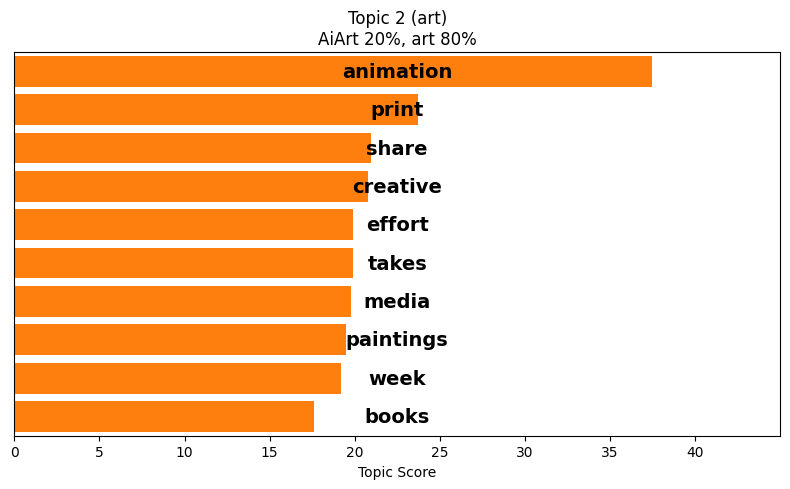

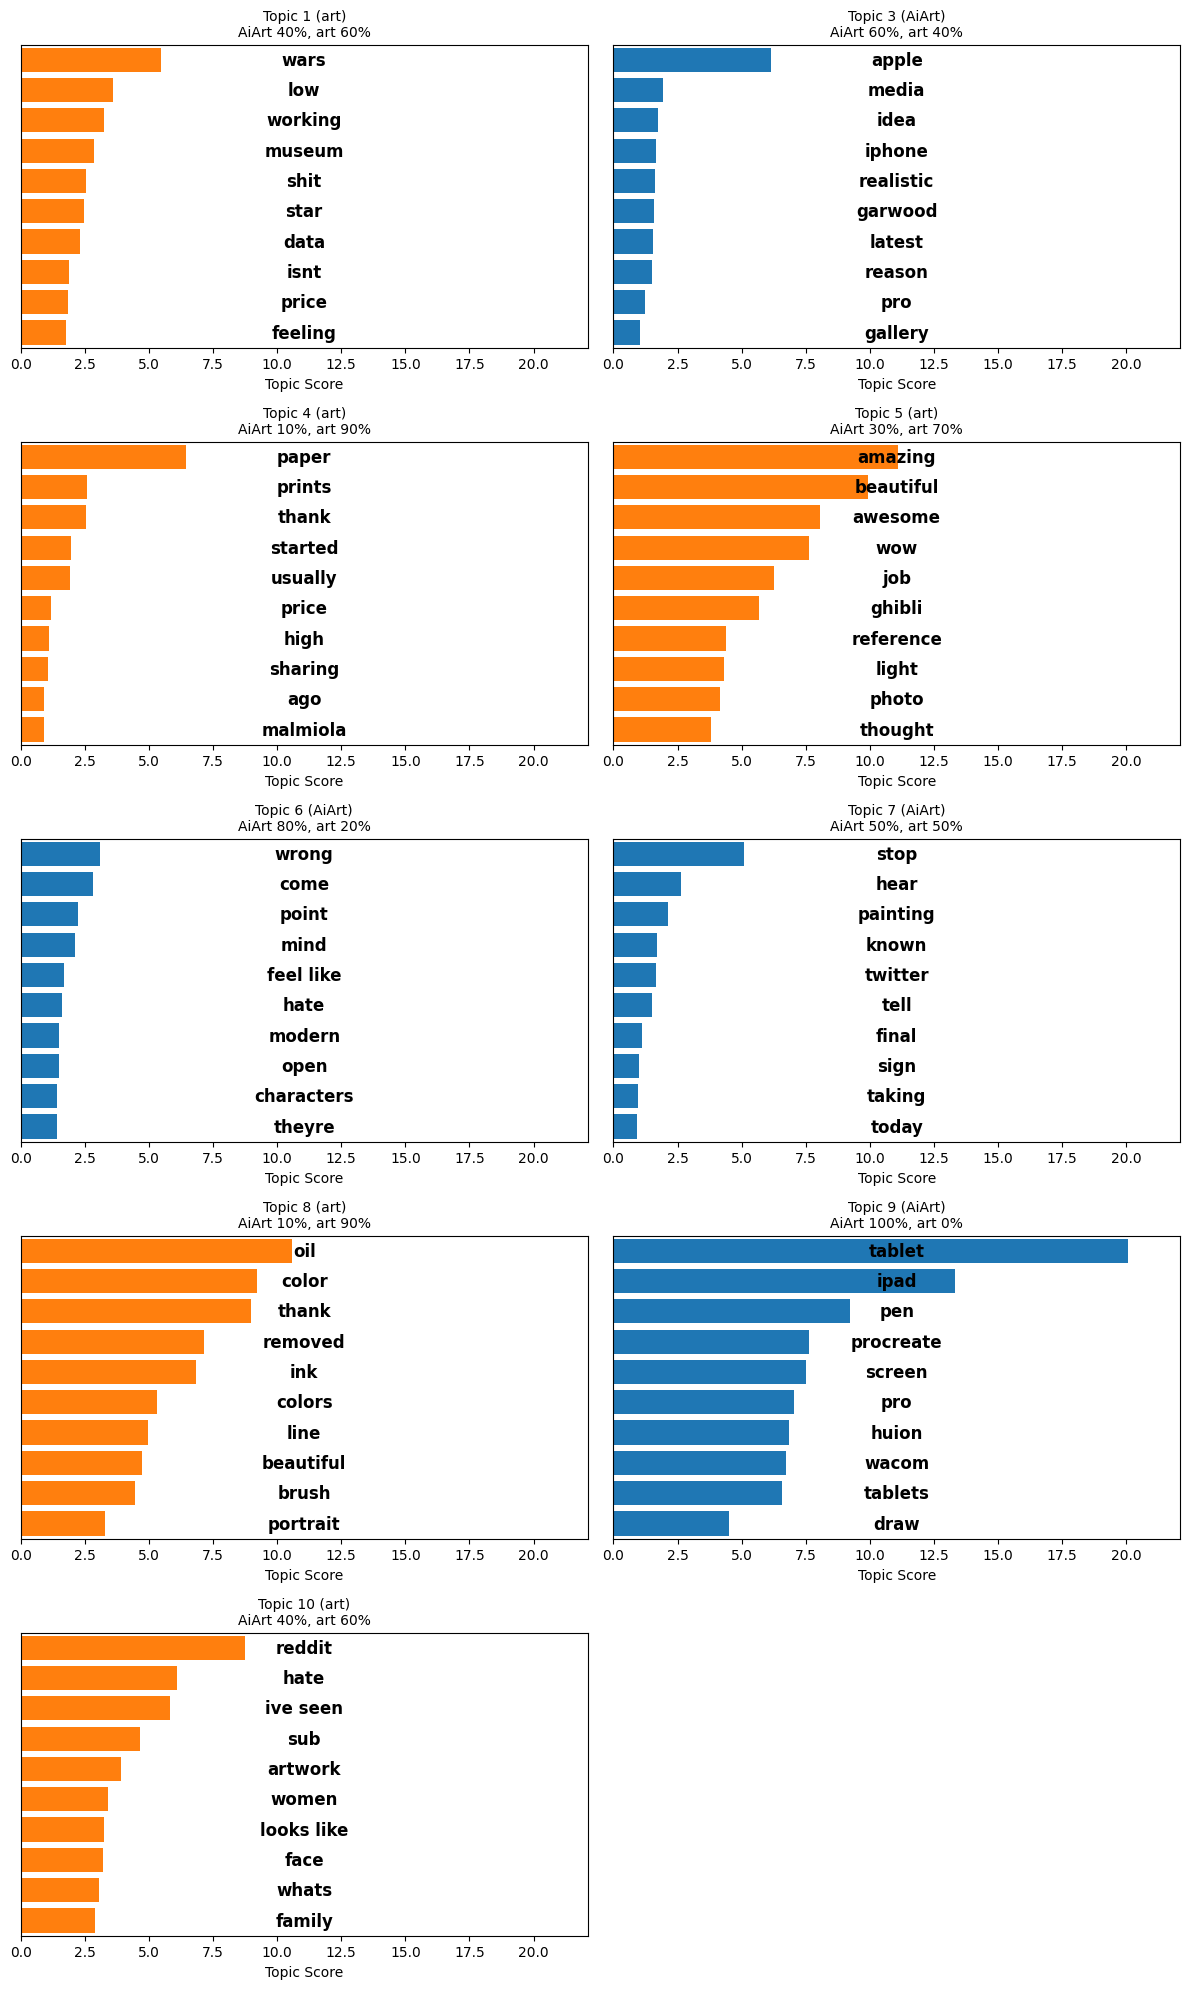

In [35]:
import math
import matplotlib.pyplot as plt
import numpy as np

all_topics   = list(range(NUM_TOPICS))
outlier_idx  = 1  # zero-based index for Topic 2
others       = [i for i in all_topics if i != outlier_idx]

# Color map
color_map = {'AiArt':'tab:blue','art':'tab:orange','Mixed':'tab:gray'}

def compute_label_pct(tidx):
    comp    = lda_model.components_[tidx]
    top_idx = comp.argsort()[::-1][:num_top_words]
    top_w   = [feature_names[i] for i in top_idx]
    counts  = {'AiArt':0,'art':0,'Mixed':0}
    for w in top_w:
        counts[word_label_assoc.get(w,'Mixed')] += 1
    pct = {lab: counts[lab]/num_top_words*100 for lab in counts}
    return counts, pct

# —————————————————————
# 1) Plot Topic 2 alone, as horizontal bars
# —————————————————————

comp    = lda_model.components_[outlier_idx]
top_idx = comp.argsort()[::-1][:num_top_words]
words   = [feature_names[i] for i in top_idx]
vals    = comp[top_idx]

counts, pct = compute_label_pct(outlier_idx)
maj_label   = max(counts, key=counts.get)

fig, ax = plt.subplots(figsize=(8,5))
y_pos = np.arange(len(words))

# horizontal bars
ax.barh(y_pos, vals, color=color_map[maj_label])
ax.set_ylim(-0.5, len(words)-0.5)
# invert so largest (index 0) sits at top
ax.invert_yaxis()

# determine outlier's own x-limit and midpoint
outlier_xlim = vals.max() * 1.2
ax.set_xlim(0, outlier_xlim)
mid_x = outlier_xlim / 2

# Annotate each bar at mid_x
for y, word in zip(y_pos, words):
    ax.text(
        mid_x, y, word,
        ha='center', va='center',
        fontsize=14, fontweight='bold',
        color='black'
    )

ax.set_title(
    f"Topic {outlier_idx+1} ({maj_label})\n"
    f"AiArt {pct['AiArt']:.0f}%, art {pct['art']:.0f}%",
    fontsize=12
)
ax.set_yticks([])           # hide y-axis ticks
ax.set_xlabel('Topic Score')
fig.tight_layout()


# —————————————————————
# 2) Compute shared x-limit for the other topics
# —————————————————————

max_vals = []
for tidx in others:
    comp = lda_model.components_[tidx]
    top_idx = comp.argsort()[::-1][:num_top_words]
    max_vals.append(comp[top_idx].max())

# 1.1× the true max of the other topics
common_xlim = max(max_vals) * 1.1


# —————————————————————
# 3) Plot the other topics together, horizontal
# —————————————————————

n_cols = 2
n_rows = math.ceil(len(others)/n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
axes = axes.flatten()

for plot_i, tidx in enumerate(others):
    comp    = lda_model.components_[tidx]
    top_idx = comp.argsort()[::-1][:num_top_words]
    words   = [feature_names[i] for i in top_idx]
    vals    = comp[top_idx]

    ax = axes[plot_i]
    y_pos = np.arange(len(words))

    # horizontal bars
    counts, pct = compute_label_pct(tidx)
    maj_label   = max(counts, key=counts.get)
    ax.barh(y_pos, vals, color=color_map[maj_label])
    ax.set_ylim(-0.5, len(words)-0.5)
    # invert so largest at top
    ax.invert_yaxis()

    # shared x-limit and midpoint
    ax.set_xlim(0, common_xlim)
    mid_x = common_xlim / 2

    # annotate at mid_x
    for y, word in zip(y_pos, words):
        ax.text(
            mid_x, y, word,
            ha='center', va='center',
            fontsize=12, fontweight='bold',
            color='black'
        )

    ax.set_title(
        f"Topic {tidx+1} ({maj_label})\n"
        f"AiArt {pct['AiArt']:.0f}%, art {pct['art']:.0f}%",
        fontsize=10
    )
    ax.set_yticks([])
    ax.set_xlabel('Topic Score')

# remove any leftover empty subplots
for j in range(len(others), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


In [ ]:
import warnings
import numpy as np
import pyLDAvis

from sklearn.decomposition import LatentDirichletAllocation

warnings.filterwarnings("ignore", category=DeprecationWarning)


NUM_TOPICS = 10
lda_model = LatentDirichletAllocation(
    n_components=NUM_TOPICS,
    max_iter=500,
    learning_method='online',
    random_state=42
)

doc_topic_dists = lda_model.fit_transform(dtm)
print("LDA fitting complete.")


topic_term_dists = lda_model.components_ / lda_model.components_.sum(axis=1)[:, None]


doc_lengths = dtm.sum(axis=1)


vocab = vectorizer500.get_feature_names_out()



term_frequency = dtm.sum(axis=0)


panel = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency,
)  

pyLDAvis.save_html(panel, "LDA_Interactive_Visualization.html")


✅ LDA fitting complete.


In [42]:

pyLDAvis.display(panel)


## NAIVE BAYES


balanced_df.sample(30)

,LABEL,text
63,AiArt,psa for everyone please cover usernames when y...
1067,art,untitled sketch for future by me pencil hell...
935,art,latest nsfw tag warning im proud of this one ...
775,art,One of the strangest works of art in the Rijks...
135,AiArt,quiet wip flat colours and line metal gear so...
167,AiArt,would like some help with choosing a tablet i...
980,art,mt matterhorn akash me oil
59,AiArt,theres a problem with nightshade
1078,art,entry fee and a membership i just saw an open ...
89,AiArt,sometimes failed completely was knight rider


In [56]:
from sklearn.pipeline       import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection  import GridSearchCV
from sklearn.naive_bayes      import MultinomialNB

texts = VIDEOdf['text'].fillna('').tolist()
labels = VIDEOdf['LABEL'].tolist()

X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.3, random_state=42
)


pipe = Pipeline([
    ("tfidf", TfidfVectorizer(
        token_pattern=r'\b[a-zA-Z]{3,}\b',
        lowercase=True,
        stop_words='english',
        max_df=0.1
    )),
    ("chi2", SelectKBest(chi2)),        # pick the k best features
    ("clf", MultinomialNB()),           # your classifier
])

In [57]:
param_grid = {
    "tfidf__ngram_range": [(1,1), (1,2), (1,4)],   # include your original 1–4 grams
    "chi2__k": [100, 300, 500, 800],               # try keeping more features
    "clf__alpha": [0.01, 0.1, 0.5, 1.0],            # include lighter smoothing
}

In [58]:
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)


print("Best parameters:", grid.best_params_)
best = grid.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'chi2__k': 800, 'clf__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}


              precision    recall  f1-score   support

       AiArt       0.84      0.93      0.88       239
         art       0.89      0.76      0.82       178

    accuracy                           0.86       417
   macro avg       0.87      0.85      0.85       417
weighted avg       0.86      0.86      0.86       417



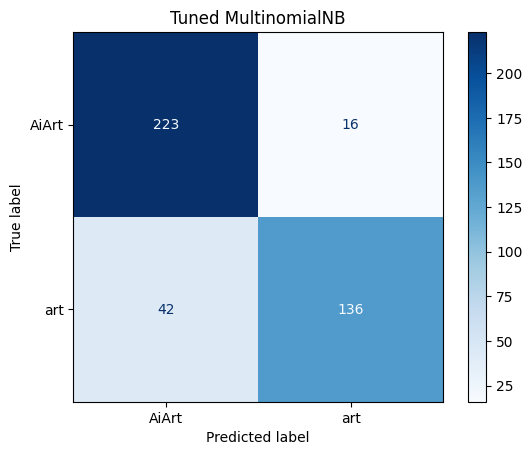

In [59]:
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))
display_confusion_matrix(y_test, y_pred, "Tuned MultinomialNB", best)